In [2]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from tensorflow.keras.layers import Input, Dense, Bidirectional, LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, TFRobertaModel


data_path = '../data/processed/IMDB Dataset_processed.csv'
data = pd.read_csv(data_path)

data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

custom_objects_dict = {
    'TFRobertaModel': TFRobertaModel,
    'Bidirectional': Bidirectional,
    'LSTM': LSTM
}

model_path = 'Model_8986_50epoch.h5'

model = load_model(model_path, custom_objects=custom_objects_dict)

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

max_length = 800 

data['review'] = data['review'].astype(str)


encoded_data = tokenizer(data['review'].tolist(), padding=True, truncation=True, max_length=max_length, return_tensors="tf")


predictions = model.predict([encoded_data['input_ids'], encoded_data['attention_mask']])

non_negative_prob = predictions[:, 1] + predictions[:, 2]  
binary_predictions = np.zeros_like(predictions[:, 0])
binary_predictions[non_negative_prob > predictions[:, 0]] = 1  




KeyboardInterrupt: 

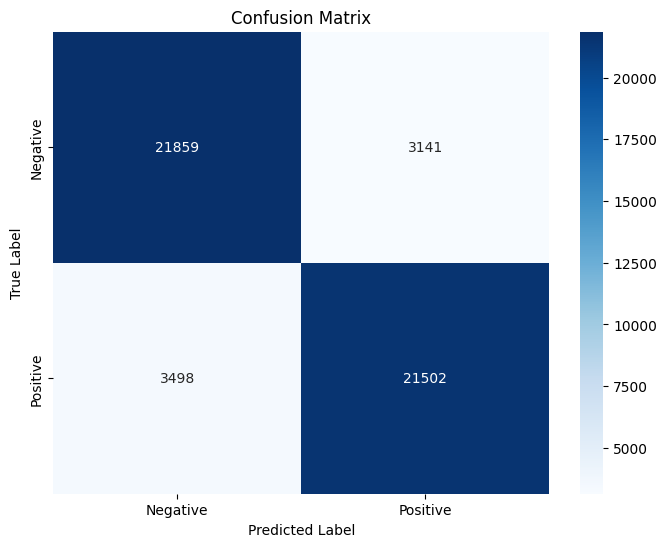


Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.87      0.87     25000
    Positive       0.87      0.86      0.87     25000

    accuracy                           0.87     50000
   macro avg       0.87      0.87      0.87     50000
weighted avg       0.87      0.87      0.87     50000

Accuracy: 0.8672
Precision: 0.8673
Recall: 0.8672
F1 Score: 0.8672


In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


true_labels = data['sentiment'].values

predicted_labels = binary_predictions

conf_matrix = confusion_matrix(true_labels, predicted_labels)


class_report = classification_report(true_labels, predicted_labels, target_names=['Negative', 'Positive'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(class_report)

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
